In [1]:
import jqdatasdk as jq
import pandas as pd
import numpy as np
import seaborn as sns
from jqdatasdk import *
import matplotlib.pyplot as plt

In [2]:
jq.auth('18610921590','DIDIw@2007!')

auth success


In [3]:
import jqdatasdk as jq

In [5]:
from jqdatasdk import finance 
q=query(finance.STK_FIN_FORCAST).filter(finance.STK_FIN_FORCAST.code=='600519.XSHG',finance.STK_FIN_FORCAST.pub_date>='2015-01-01')
df=finance.run_query(q)
print(df)

       id  company_id         code         name    end_date  report_type_id  \
0  138256   420600519  600519.XSHG  贵州茅台酒股份有限公司  2017-12-31          304004   

  report_type    pub_date  type_id    type profit_min profit_max  \
0       四季度预告  2018-01-31   305001  业绩大幅上升       None       None   

    profit_last  profit_ratio_min  profit_ratio_max  \
0  1.671836e+10              58.0              58.0   

                                     content  
0  预计公司2017年01-12月归属于上市公司股东的净利润与上年同期相比增长58%。  


In [3]:
def for_pirce(pl):
    import datetime
    import jqdatasdk as jq
    import pandas as pd
    import numpy as np
    import seaborn as sns
    jq.auth('18610921590','DIDIw@2007!')
    import matplotlib.pyplot as plt
    today = datetime.date.today()
    tomorrow = today + datetime.timedelta(days=1)
    today = today.isoformat()
    tomorrow = tomorrow.isoformat()
    df = jq.get_price(pl,start_date= today,end_date=tomorrow, frequency='minute',skip_paused=True)
    df_new = df[df.volume != 0 ]
    df_plot = df_new[['money','volume','close']]
    df_plot['price'] = df_plot['money']/df_plot['volume']
    df_p = df_plot[['price','volume']]
    df_p.price.plot(legend=True,figsize = [15,6])
    df_p.volume.plot(secondary_y=True,legend=True)
#    l = df[df.volume != 0]['volume']
#    l2 = df[df.volume != 0]['money']
#    l3 = l2/l
#    f, axes = plt.subplots(2, 1, figsize=(7, 7), sharex=True)
#    l.plot(ax=axes[0])
#    l3.plot(ax = axes[1])
#    df_p.plot(figsize = [15,6])
#    plt.show()
    print(df[df.volume != 0].tail(10))
    return df

/Users/didiw/anaconda3/envs/py3ana/lib/python3.5/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


                     open  close  high   low    volume     money
2018-11-13 10:02:00  5.27   5.27  5.27  5.27   31200.0  164414.0
2018-11-13 10:03:00  5.27   5.27  5.27  5.27   28100.0  148087.0
2018-11-13 10:04:00  5.27   5.27  5.28  5.27   28900.0  152415.0
2018-11-13 10:05:00  5.28   5.29  5.30  5.27   74900.0  395855.0
2018-11-13 10:06:00  5.30   5.31  5.31  5.28   40400.0  214134.0
2018-11-13 10:07:00  5.31   5.32  5.32  5.31   58500.0  310885.0
2018-11-13 10:08:00  5.32   5.33  5.33  5.32   57700.0  307481.0
2018-11-13 10:09:00  5.33   5.29  5.33  5.29  106800.0  566199.0
2018-11-13 10:10:00  5.29   5.32  5.33  5.28   46500.0  246467.0
2018-11-13 10:11:00  5.33   5.32  5.33  5.32   83900.0  446920.0


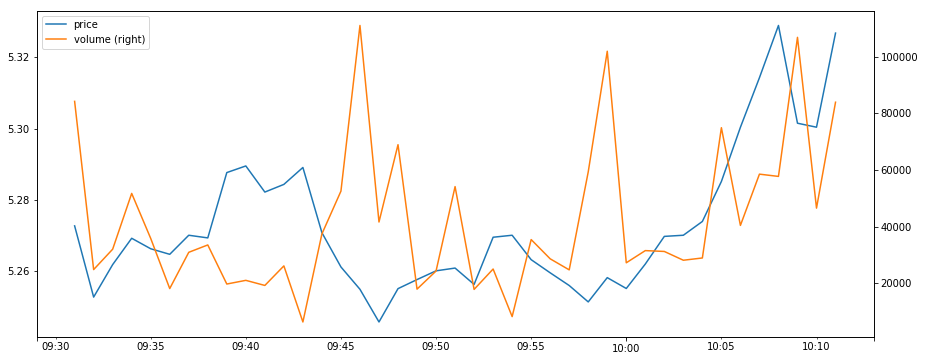

In [4]:
df = for_pirce('300056.XSHE')

In [7]:
import datetime
today = datetime.date.today()
tomorrow = today + datetime.timedelta(days=1)
today = today.isoformat()
tomorrow = tomorrow.isoformat()
df1 = jq.get_price('300056.XSHE',start_date= today,end_date=tomorrow, frequency='minute',skip_paused=True)
print('max' ,max(df1['high']))

max 8.2
